In [36]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
diabetes = load_diabetes()

In [37]:
df_x = diabetes.data
df_y = diabetes.target
df_x = np.array(df_x)
d_y = np.array(df_y)

In [38]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [39]:
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [40]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [42]:
W = np.random.rand(10,1)
b = np.random.rand(1,1)
W

array([[0.35420213],
       [0.85934499],
       [0.18940416],
       [0.89267179],
       [0.537985  ],
       [0.64516059],
       [0.20802881],
       [0.74327168],
       [0.13444966],
       [0.55769622]])

In [43]:
def model(W, b, X):
    Y = X.dot(W) + b
    return Y

In [44]:
y = model(W, b, X_train)
y_train.shape
y.shape

(353, 1)

In [45]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [46]:
def loss(x, w, b, y):
    predictions = model(w, b, x)
    L = RMSE(predictions, y)
    return L
L = loss(X_train, W, b, y_train)

In [47]:
def gradient(x, w, b, y):
    dw = np.random.rand(10,1)
    w2 = w.copy()
    for i in range(0,9):
        w2[i] = w[i] + 0.0001
        dw[i] = (loss(x, w2, b, y) - loss(x, w, b, y)) / 0.0001
        db = (loss(x, w2, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [48]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

In [49]:
dW, db = gradient(X_train, W, b, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
dW

array([[-0.0012661 ],
       [-0.00141075],
       [-0.00293728],
       [-0.00396266],
       [-0.00343909],
       [-0.00269266],
       [-0.00182665],
       [-0.00213228],
       [-0.00319044],
       [ 0.01207486]])

In [54]:
LEARNING_RATE = 0.1
losses = []
for i in range(1, 2000):
    dW, db = gradient(X_train, W, b, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    W -= LEARNING_RATE * dW         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X_train, W, b, y_train)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 

y_test_predict = X_test.dot(W) + b
MAPE(y_test, y_test_predict)

Iteration 100 : Loss 148.6393
Iteration 200 : Loss 141.5070
Iteration 300 : Loss 134.6750
Iteration 400 : Loss 128.1749
Iteration 500 : Loss 122.0385
Iteration 600 : Loss 116.3008
Iteration 700 : Loss 110.9915
Iteration 800 : Loss 106.1362
Iteration 900 : Loss 101.7506
Iteration 1000 : Loss 97.8449
Iteration 1100 : Loss 94.4168
Iteration 1200 : Loss 91.4521
Iteration 1300 : Loss 88.9279
Iteration 1400 : Loss 86.8067
Iteration 1500 : Loss 85.0510
Iteration 1600 : Loss 83.6154
Iteration 1700 : Loss 82.4518
Iteration 1800 : Loss 81.5206
Iteration 1900 : Loss 80.7820


54.79595687382539

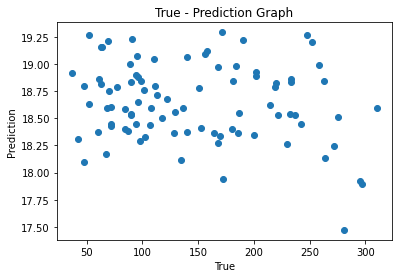

In [52]:
import matplotlib.pyplot as plt

x = np.arange(50, 300, 0.01)
y = np.arange(50, 300, 0.01)
plt.scatter(y_test, y_test_predict)
plt.xlabel("True")
plt.ylabel("Prediction")
plt.title("True - Prediction Graph")
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_x = diabetes.data
df_y = diabetes.target
df_x = np.array(df_x)
d_y = np.array(df_y)

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()  #선형 회귀 모델을 가지고 오고 
linear_regression_model.fit(X_train, y_train)  #학습 데이터를 이용해서 모델을 학습 시킨다

linear_regression_model.coef_ #θ1~ 값
linear_regression_model.intercept_ #θ0값

y_test_predict = linear_regression_model.predict(X_test) #학습시킨 모델로 예측

#평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단
mse = mean_squared_error(y_test, y_test_predict)

print(mse)

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
MAPE(y_test, y_test_predict)

2900.1732878832318


37.49981253089933

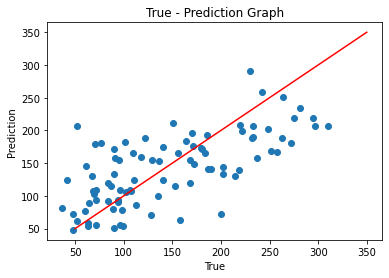

In [57]:
import matplotlib.pyplot as plt


x = np.arange(50, 350, 0.01)
y = np.arange(50, 350, 0.01)
plt.scatter(y_test, y_test_predict)
plt.plot(x,y, color = "red")
plt.xlabel("True")
plt.ylabel("Prediction")
plt.title("True - Prediction Graph")
plt.show()